In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math
pickle_in = open("data_3class.pkl","rb")
data3 = pickle.load(pickle_in)
train_X = data3['train'][0]
train_Y = data3['train'][1]
test_X = data3['test'][0]
test_Y = data3['test'][1]

iteration 0: loss 1.999962
iteration 100: loss 1.095509
iteration 200: loss 1.054139
iteration 300: loss 1.052793
iteration 400: loss 1.052140
iteration 500: loss 1.051429
iteration 600: loss 1.050568
iteration 700: loss 1.049469
iteration 800: loss 1.047998
iteration 900: loss 1.045913
training accuracy: 0.53


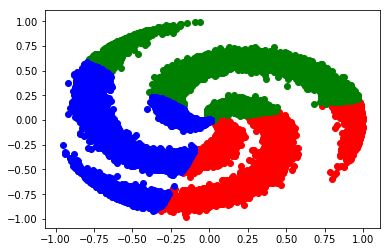

test accuracy: 0.53


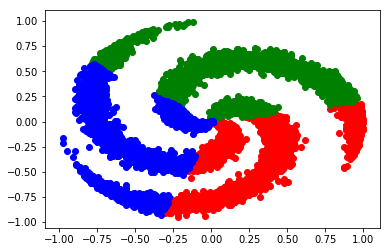

Training Error Plot


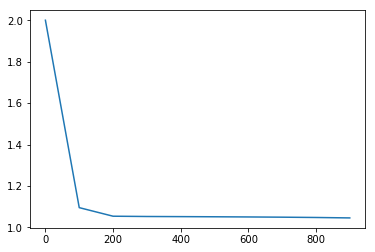

In [2]:
#gradient of tanh is 1-f(x)*f(x)

# initialize parameters randomly
D=2
K=3
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))#bias from input to hidden layer
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))#bias from hidden to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(1000):
  
    #Forward
    hidden_layer = np.tanh(np.dot(train_X, W) + b) # sigmoid activation
    scores = np.dot(hidden_layer, W2) + b2
  
    correct_class_score = scores[np.arange(len(train_Y)), train_Y]

    # add an axis with np.newaxis so we can perform the substraction.
  
    margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
    margins[np.arange(num_examples), train_Y] = 0
    loss = np.sum(margins)/num_examples
  
    if i % 100 == 0:
        print("iteration %d: loss %f" % (i, loss))
        loss_plot.append(loss)
        x_plot.append(i)
        
    #gradients
    mask = np.zeros(margins.shape)
    mask[margins > 0] = 1
    np_sup_zero = np.sum(mask, axis=1)
    mask[np.arange(num_examples), train_Y] = -np_sup_zero
    dscores = mask
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the sigmoid non-linearity
    dhidden = dhidden*(1-(np.tanh(hidden_layer)*np.tanh(hidden_layer)))
    # finally into W,b
    dW = np.dot(train_X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    
# evaluate training set accuracy
hidden_layer = np.tanh(np.dot(train_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2# evaluate training set accuracy
#correct_class_score = scores[np.arange(len(train_Y)), train_Y]
#margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
#margins[np.arange(num_examples), train_Y] = 0
predicted_classtrain = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
class2 = train_X[predicted_classtrain==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()
hidden_layer = np.tanh(np.dot(test_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
#correct_class_score = scores[np.arange(len(test_Y)), test_Y]
#margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
#margins[np.arange(len(test_Y)), test_Y] = 0
predicted_classtest = np.argmax(scores, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
class2 = test_X[predicted_classtest==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()


print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()

iteration 0: loss 2.091334
iteration 10: loss 1.258152
iteration 20: loss 1.095072
iteration 30: loss 1.067750
iteration 40: loss 1.059119
iteration 50: loss 1.055620
iteration 60: loss 1.053992
iteration 70: loss 1.053140
iteration 80: loss 1.052610
iteration 90: loss 1.052218
iteration 100: loss 1.051910
iteration 110: loss 1.051635
iteration 120: loss 1.051377
iteration 130: loss 1.051125
iteration 140: loss 1.050874
iteration 150: loss 1.050622
iteration 160: loss 1.050367
iteration 170: loss 1.050108
iteration 180: loss 1.049843
iteration 190: loss 1.049571
iteration 200: loss 1.049292
iteration 210: loss 1.049007
iteration 220: loss 1.048713
iteration 230: loss 1.048410
iteration 240: loss 1.048098
iteration 250: loss 1.047775
iteration 260: loss 1.047441
iteration 270: loss 1.047095
iteration 280: loss 1.046737
iteration 290: loss 1.046364
iteration 300: loss 1.045977
iteration 310: loss 1.045574
iteration 320: loss 1.045155
iteration 330: loss 1.044717
iteration 340: loss 1.044

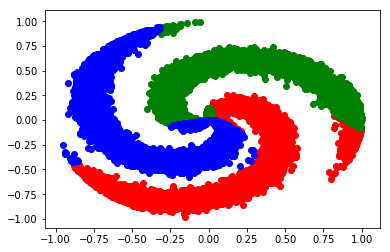

test accuracy: 0.91


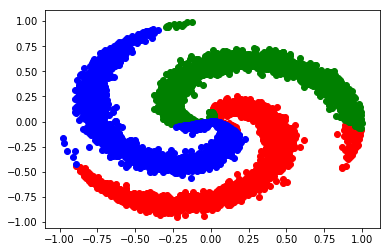

Training Error Plot


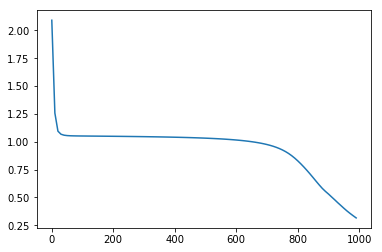

In [3]:
# initialize parameters randomly
D=2
K=3
h1 = 100 # size of hidden layer 1
h2 = 100 #size of hidden layer 2
W = 0.1 * np.random.randn(D,h1)
b = np.zeros((1,h1))#bias from input to hidden layer 1
W2 = 0.1 * np.random.randn(h1,h2)
b2 = np.zeros((1,h2))#bias from hidden layer 1 to hidden layer 2
W3 = 0.1 * np.random.randn(h2,K)
b3 = np.zeros((1,K))#bias from hidden layer 2 to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(1000):
  
    #Forward
    hidden_layer1 = np.tanh(np.dot(train_X, W) + b)
    hidden_layer2 = np.tanh(np.dot(hidden_layer1, W2) + b2) 
    scores = np.dot(hidden_layer2, W3) + b3
  
    correct_class_score = scores[np.arange(len(train_Y)), train_Y]

    # add an axis with np.newaxis so we can perform the substraction.
  
    margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
    margins[np.arange(num_examples), train_Y] = 0
    loss = np.sum(margins)/num_examples
  
    if i % 10 == 0:
        print("iteration %d: loss %f" % (i, loss))
        loss_plot.append(loss)
        x_plot.append(i)
        
    #gradients
    mask = np.zeros(margins.shape)
    mask[margins > 0] = 1
    np_sup_zero = np.sum(mask, axis=1)
    mask[np.arange(num_examples), train_Y] = -np_sup_zero
    dscores = mask
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW3 = np.dot(hidden_layer2.T, dscores)
    db3 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden2 = np.dot(dscores, W3.T)
    # backprop the sigmoid non-linearity
    dhidden2 = dhidden2*(1-(np.tanh(hidden_layer2)*np.tanh(hidden_layer2)))
    dW2 = np.dot(hidden_layer1.T,dhidden2)
    db2 = np.sum(dhidden2, axis=0, keepdims=True)
    
    # next backprop into hidden layer 1
    dhidden1 = np.dot(dhidden2, W2.T)
    # backprop the sigmoid non-linearity
    dhidden1 = dhidden1*(1-(np.tanh(hidden_layer1)*np.tanh(hidden_layer1)))
    # finally into W,b
    dW = np.dot(train_X.T, dhidden1)
    db = np.sum(dhidden1, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    W3 += -step_size * dW3
    b3 += -step_size * db3
# evaluate training set accuracy
hidden_layer1 = np.tanh(np.dot(train_X, W) + b) 
hidden_layer2 = np.tanh(np.dot(hidden_layer1, W2) + b2) 
scores = np.dot(hidden_layer2, W3) + b3
# compute the class probabilities - softmax
#exp_scores = np.exp(scores)
#probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
class2 = train_X[predicted_classtrain==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()
hidden_layer1 = np.tanh(np.dot(test_X, W) + b) 
hidden_layer2 = np.tanh(np.dot(hidden_layer1, W2) + b2) 
scores = np.dot(hidden_layer2, W3) + b3
#exp_scores = np.exp(scores)
#probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(scores, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
class2 = test_X[predicted_classtest==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()    
    
print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()

In [4]:
pickle_in = open("data_2class.pkl","rb")
data2 = pickle.load(pickle_in)
train_X = data2['train'][0]
train_Y = data2['train'][1]
test_X = data2['test'][0]
test_Y = data2['test'][1]

iteration 0: loss 0.999670
iteration 10: loss 0.995909
iteration 20: loss 0.989604
iteration 30: loss 0.976741
iteration 40: loss 0.949194
iteration 50: loss 0.889676
iteration 60: loss 0.761297
iteration 70: loss 0.575745
iteration 80: loss 0.537989
iteration 90: loss 0.520469
iteration 100: loss 0.510071
iteration 110: loss 0.503565
iteration 120: loss 0.499490
iteration 130: loss 0.496770
iteration 140: loss 0.494858
iteration 150: loss 0.493478
iteration 160: loss 0.492506
iteration 170: loss 0.491834
iteration 180: loss 0.491358
iteration 190: loss 0.491016
iteration 200: loss 0.490757
iteration 210: loss 0.490552
iteration 220: loss 0.490399
iteration 230: loss 0.490297
iteration 240: loss 0.490225
iteration 250: loss 0.490169
iteration 260: loss 0.490126
iteration 270: loss 0.490095
iteration 280: loss 0.490071
iteration 290: loss 0.490052
iteration 300: loss 0.490036
iteration 310: loss 0.490023
iteration 320: loss 0.490014
iteration 330: loss 0.490006
iteration 340: loss 0.490

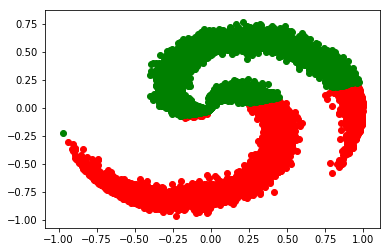

test accuracy: 0.77


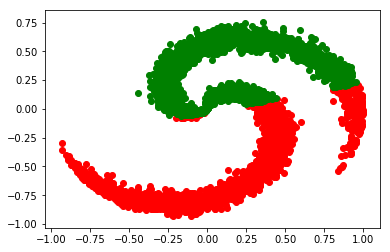

Training Error Plot


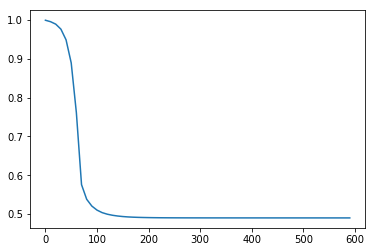

In [5]:
#gradient of tanh is 1-f(x)*f(x)

# initialize parameters randomly
D=2
K=2
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))#bias from input to hidden layer
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))#bias from hidden to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(600):
  
    #Forward
    hidden_layer = np.tanh(np.dot(train_X, W) + b) # sigmoid activation
    scores = np.dot(hidden_layer, W2) + b2
  
    correct_class_score = scores[np.arange(len(train_Y)), train_Y]

    # add an axis with np.newaxis so we can perform the substraction.
  
    margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
    margins[np.arange(num_examples), train_Y] = 0
    loss = np.sum(margins)/num_examples
  
    if i % 10 == 0:
        print("iteration %d: loss %f" % (i, loss))
        loss_plot.append(loss)
        x_plot.append(i)
        
    #gradients
    mask = np.zeros(margins.shape)
    mask[margins > 0] = 1
    np_sup_zero = np.sum(mask, axis=1)
    mask[np.arange(num_examples), train_Y] = -np_sup_zero
    dscores = mask
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the sigmoid non-linearity
    dhidden = dhidden*(1-(np.tanh(hidden_layer)*np.tanh(hidden_layer)))
    # finally into W,b
    dW = np.dot(train_X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    
# evaluate training set accuracy
hidden_layer = np.tanh(np.dot(train_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2# evaluate training set accuracy
#correct_class_score = scores[np.arange(len(train_Y)), train_Y]
#margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
#margins[np.arange(num_examples), train_Y] = 0
predicted_classtrain = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()
hidden_layer = np.tanh(np.dot(test_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
#correct_class_score = scores[np.arange(len(test_Y)), test_Y]
#margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
#margins[np.arange(len(test_Y)), test_Y] = 0
predicted_classtest = np.argmax(scores, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()


print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()

iteration 0: loss 1.015497
iteration 100: loss 0.489698
iteration 200: loss 0.489372
iteration 300: loss 0.489038
iteration 400: loss 0.488526
iteration 500: loss 0.487637
training accuracy: 0.77


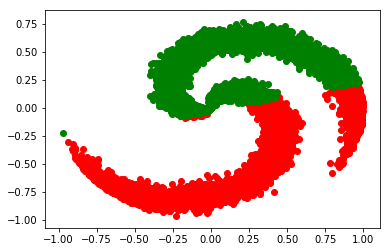

test accuracy: 0.77


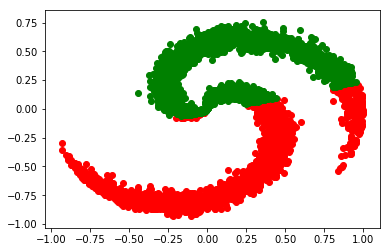

Training Error Plot


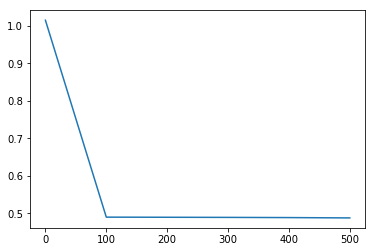

In [6]:
# initialize parameters randomly
D=2
K=2
h1 = 100 # size of hidden layer 1
h2 = 100 #size of hidden layer 2
W = 0.1 * np.random.randn(D,h1)
b = np.zeros((1,h1))#bias from input to hidden layer 1
W2 = 0.1 * np.random.randn(h1,h2)
b2 = np.zeros((1,h2))#bias from hidden layer 1 to hidden layer 2
W3 = 0.1 * np.random.randn(h2,K)
b3 = np.zeros((1,K))#bias from hidden layer 2 to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(600):
  
    #Forward
    hidden_layer1 = np.tanh(np.dot(train_X, W) + b)
    hidden_layer2 = np.tanh(np.dot(hidden_layer1, W2) + b2) 
    scores = np.dot(hidden_layer2, W3) + b3
  
    correct_class_score = scores[np.arange(len(train_Y)), train_Y]

    # add an axis with np.newaxis so we can perform the substraction.
  
    margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
    margins[np.arange(num_examples), train_Y] = 0
    loss = np.sum(margins)/num_examples
  
    if i % 100 == 0:
        print("iteration %d: loss %f" % (i, loss))
        loss_plot.append(loss)
        x_plot.append(i)
        
    #gradients
    mask = np.zeros(margins.shape)
    mask[margins > 0] = 1
    np_sup_zero = np.sum(mask, axis=1)
    mask[np.arange(num_examples), train_Y] = -np_sup_zero
    dscores = mask
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW3 = np.dot(hidden_layer2.T, dscores)
    db3 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden2 = np.dot(dscores, W3.T)
    # backprop the sigmoid non-linearity
    dhidden2 = dhidden2*(1-(np.tanh(hidden_layer2)*np.tanh(hidden_layer2)))
    dW2 = np.dot(hidden_layer1.T,dhidden2)
    db2 = np.sum(dhidden2, axis=0, keepdims=True)
    
    # next backprop into hidden layer 1
    dhidden1 = np.dot(dhidden2, W2.T)
    # backprop the sigmoid non-linearity
    dhidden1 = dhidden1*(1-(np.tanh(hidden_layer1)*np.tanh(hidden_layer1)))
    # finally into W,b
    dW = np.dot(train_X.T, dhidden1)
    db = np.sum(dhidden1, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    W3 += -step_size * dW3
    b3 += -step_size * db3
# evaluate training set accuracy
hidden_layer1 = np.tanh(np.dot(train_X, W) + b) 
hidden_layer2 = np.tanh(np.dot(hidden_layer1, W2) + b2) 
scores = np.dot(hidden_layer2, W3) + b3
# compute the class probabilities - softmax
#exp_scores = np.exp(scores)
#probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()
hidden_layer1 = np.tanh(np.dot(test_X, W) + b) 
hidden_layer2 = np.tanh(np.dot(hidden_layer1, W2) + b2) 
scores = np.dot(hidden_layer2, W3) + b3
#exp_scores = np.exp(scores)
#probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(scores, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()    
    
print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()